In [ ]:
!pip3 install -q -U bitsandbytes==0.44.0
!pip3 install -q -U peft==0.8.2
!pip3 install -q -U trl==0.7.10
!pip3 install -q -U accelerate==0.34.2
!pip3 install -q -U datasets==2.17.0
!pip3 install -q -U transformers==4.38.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.1.0 which is incompatible.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2023.10.0 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.0 which is incompatible.


In [ ]:
!pip install pyarrow==14.0.1 fsspec==2024.6.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.10.0
    Uninstalling fsspec-2023.10.0:
      Successfully uninstalled fsspec-2023.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.17.0 requires fsspec[http]<=2023.10.0,>=2023.1.0, but you have fsspec 2024.6.1 which is incompatible.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.6.1 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.0 which is incompatible.


In [ ]:
import os
import transformers
import torch
from google.colab import userdata
from datasets import load_dataset

In [ ]:
from trl import SFTTrainer
from peft import LoraConfig
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig, GemmaTokenizer

In [ ]:
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

In [ ]:
model_id = "google/gemma-2b"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
!pip3 install -q -U bitsandbytes
!pip3 install -q -U accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 9.1 MB/s eta 0:00:00


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_id, token=os.environ['HF_TOKEN'])
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             quantization_config=bnb_config,
                                             device_map={"":0},
                                             token=os.environ['HF_TOKEN'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
os.environ["WANDB_DISABLED"] = "false"

In [ ]:
lora_config = LoraConfig(
    r = 8,
    target_modules = ["q_proj", "o_proj", "k_proj", "v_proj",
                      "gate_proj", "up_proj", "down_proj"],
    task_type = "CAUSAL_LM",
)

In [ ]:
!pip install -q -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 16.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.1.0 which is incompatible.
pylibcudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.1.0 which is incompatible.


In [ ]:
pip install -U datasets huggingface_hub fsspec

  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.5/450.5 kB 14.4 MB/s eta 0:00:00
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.5
    Uninstalling huggingface-hub-0.26.5:
      Successfully uninstalled huggingface-hub-0.26.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.1.0 which is incompatible.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but y

In [ ]:
from datasets import load_dataset

data = load_dataset("gretelai/synthetic_text_to_sql")
data = data.map(lambda samples: tokenizer(samples["sql_prompt"]), batched=True)

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [ ]:
data['train']['sql_prompt']

['What is the total volume of timber sold by each salesperson, sorted by salesperson?',
 'List all the unique equipment types and their corresponding total maintenance frequency from the equipment_maintenance table.',
 'How many marine species are found in the Southern Ocean?',
 'What is the total trade value and average price for each trader and stock in the trade_history table?',
 'Find the energy efficiency upgrades with the highest cost and their types.',
 'What is the total spending on humanitarian assistance by the European Union in the last 3 years?',
 'What is the average water temperature for each fish species in February?',
 "Delete a program's outcome data",
 "Find the total fare collected from passengers on 'Green Line' buses",
 'What is the average property size in inclusive housing areas?',
 'What is the average income of farmers in each district in India?',
 'What is the average sea surface temperature in the Pacific Ocean per year?',
 "Update the end date of carbon offs

In [ ]:
data['test']['sql_prompt']

["What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?",
 'Delete all records of rural infrastructure projects in Indonesia that have a completion date before 2010.',
 'How many accidents have been recorded for SpaceX and Blue Origin rocket launches?',
 'What is the maximum quantity of seafood sold in a single transaction?',
 'What is the total budget for movies released before 2010?',
 "Add a new attorney named 'Oliver Martinez' with email 'oliver.martinez@lawfirm.com' and phone '555-555-5678' to the 'attorneys' table",
 'Identify the top 2 plants with the highest CO2 emissions per ton produced.',
 "What is the total cost of all climate communication projects that ended after 2010 in 'Antarctica'?",
 'List all marine species with their conservation status.',
 "What is the average number of publications per researcher for researchers working at the 'National Geographic' organization?",
 "How many decentralized 

In [ ]:
def formatting_func(example):
    text = f"Problem: {example['sql_prompt'][0]}\nQuery: {example['sql'][0]}"
    return [text]

In [ ]:
trainer = SFTTrainer(
    model=model,
    train_dataset=data["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=3,
        gradient_accumulation_steps=4,
        warmup_steps=10,
        max_steps=250,
        learning_rate=2e-4,
        fp16=True,
        logging_steps=1,
        output_dir="outputs",
        optim="paged_adamw_8bit"
    ),
    peft_config=lora_config,
    formatting_func=formatting_func,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:223: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:290: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is dep

In [ ]:
train_result=trainer.train()

In [ ]:
text = "Problem: sort the employees based on their salary in ascending order"
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=14)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Problem: sort the employees based on their salary in ascending order
Query: SELECT * FROM employees ORDER BY salary;
Query Output


In [ ]:
text = "Problem: find the highest salary of the employees of IT department"
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=19)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Problem: find the highest salary of the employees of IT department
Query: SELECT MAX(salary) FROM IT_employees WHERE department = 'IT';



In [ ]:
text = "Problem: find the sum of salary of the employees of HR department"
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=17)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Problem: find the sum of salary of the employees of HR department
Query: SELECT SUM(salary) FROM employees WHERE department = 'HR';



In [ ]:
text = "Problem: What is the average depth of all marine protected areas in the world?"
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=14)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Problem: What is the average depth of all marine protected areas in the world?
Query: SELECT AVG(depth) FROM marine_protected_areas


In [ ]:
# Check the logs
logs = trainer.state.log_history

# Extracting losses and steps
losses = []
steps = []

for log in logs:
    if 'loss' in log and 'step' in log:
        losses.append(log['loss'])
        steps.append(log['step'])

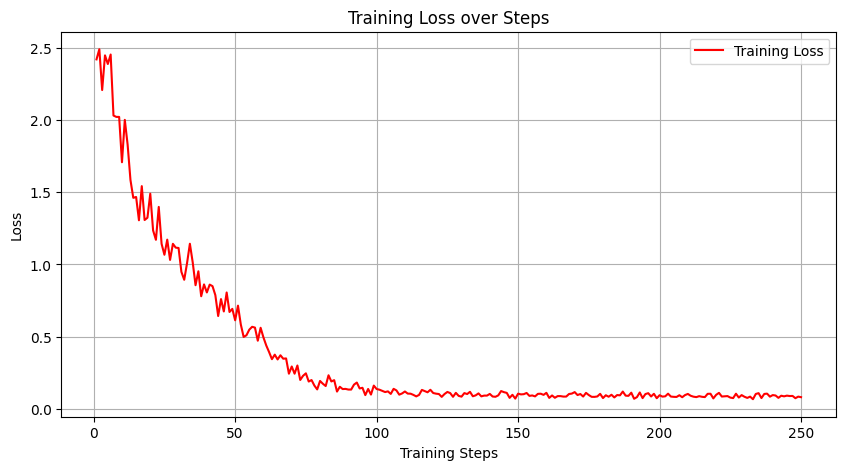

In [ ]:
import matplotlib.pyplot as plt
# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(steps, losses, label="Training Loss", color="red")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss over Steps")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
learning_rates = [lr['lr'] for lr in trainer.state.log_history if 'lr' in lr]

# Print logs to diagnose the issue
print("Log History:")
for log in trainer.state.log_history:
    print(log)


Log History:
{'loss': 2.4208, 'grad_norm': 0.9279491305351257, 'learning_rate': 2e-05, 'epoch': 0.12, 'step': 1}
{'loss': 2.4912, 'grad_norm': 0.9185807108879089, 'learning_rate': 4e-05, 'epoch': 0.24, 'step': 2}
{'loss': 2.2084, 'grad_norm': 0.8015832901000977, 'learning_rate': 6e-05, 'epoch': 0.35, 'step': 3}
{'loss': 2.4487, 'grad_norm': 1.0083378553390503, 'learning_rate': 8e-05, 'epoch': 0.47, 'step': 4}
{'loss': 2.3887, 'grad_norm': 1.0768799781799316, 'learning_rate': 0.0001, 'epoch': 0.59, 'step': 5}
{'loss': 2.4543, 'grad_norm': 1.1025269031524658, 'learning_rate': 0.00012, 'epoch': 0.71, 'step': 6}
{'loss': 2.0317, 'grad_norm': 0.9834697246551514, 'learning_rate': 0.00014, 'epoch': 0.82, 'step': 7}
{'loss': 2.0222, 'grad_norm': 1.0705513954162598, 'learning_rate': 0.00016, 'epoch': 0.94, 'step': 8}
{'loss': 2.0221, 'grad_norm': 1.2321269512176514, 'learning_rate': 0.00018, 'epoch': 1.06, 'step': 9}
{'loss': 1.708, 'grad_norm': 0.7950000762939453, 'learning_rate': 0.0002, 'epo

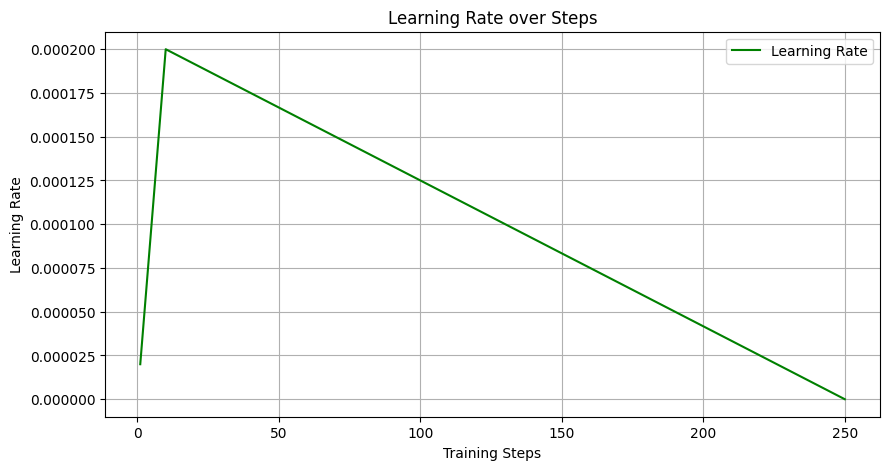

In [ ]:
# Extract the learning rate values from the trainer state using the correct key
learning_rates = [lr['learning_rate'] for lr in trainer.state.log_history if 'learning_rate' in lr]

# Plotting learning rate over steps
plt.figure(figsize=(10, 5))
plt.plot(steps, learning_rates, label="Learning Rate", color="green")
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.title("Learning Rate over Steps")
plt.grid(True)
plt.legend()
plt.show()